# sklearn Regression - 수치예측

# 실습용 데이터 설정

- pandas DataFrame
   - Insurance.csv

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


> ## 1) 분석 변수 선택

- X : 'age', 'bmi', 'children'
- y : 'expenses'

In [ ]:
# 수치 데이터만 뽑았다. 
df1 = df[['expenses', 'age', 'bmi', 'children']]
df1.head()

,expenses,age,bmi,children
0,16884.92400,19,27.900,0
1,1725.55230,18,33.770,1
2,4449.46200,28,33.000,3
3,21984.47061,33,22.705,0
4,3866.85520,32,28.880,0


> ## 2) Train & Test Split

- 7 : 3

In [ ]:
from sklearn.model_selection import train_test_split

X = df1[['age', 'bmi', 'children']]
y = df1['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (936, 3) (936,)
Test Data :  (402, 3) (402,)


# 1. Multivariate Regression

> ## 1) 모델 생성

In [ ]:
%%time
from sklearn.linear_model import LinearRegression
MR = LinearRegression(normalize = True,
                      n_jobs = -1)
MR.fit(X_train, y_train)
# Wall time 1초도 걸리지 않는다.

CPU times: user 3.74 ms, sys: 1.27 ms, total: 5.02 ms
Wall time: 34.5 ms


> ## 2) 모델 평가

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, MR.predict(X_test))

114300134.03204554

# 2. Ridge Regression

>  ## 1) 모델 생성

- alpha : Regularization strength
   - default : 1.0
   - 값이 커지면 규제가 강해지므로 weight 값을 0에 가깝게 줄이도록 학습
   - 값이 작아지면 규제가 없어지므로 weight 값을 제한하지 않음

- solver : Optimization Method
   - 'cholesy' : Matrix Decomposition(숄레스키 행렬 분해)
   - 'sag' : Stochastic Average Gradient Descent
      - solver = 'sag'
      - random_state = 2045
      - max_iter = 1000

In [ ]:
%%time
from sklearn.linear_model import Ridge
RG = Ridge(normalize = True, 
           alpha = 0.3,      # 알파에 변화를 주면 모델이 변한다. 
           solver = 'cholesky')

RG.fit(X_train, y_train)

CPU times: user 3.73 ms, sys: 955 µs, total: 4.69 ms
Wall time: 12.6 ms


> ## 2) 모델 평가

In [ ]:
mean_squared_error(y_test, RG.predict(X_test))
# 114300134 -> 113578068 줄었다.
# MSE : MultiReg > Ridge
#       114300134 > 113578068

113578068.78448391

# 3. Lasso Regression

>  ## 1) 모델 생성

- alpha : Regularization strength
   - default : 1.0
   - 값이 커지면 weight 값을 0에 가깝게 학습
   - 값이 작아지면 weight 값을 제한하지 않음

In [ ]:
%%time
from sklearn.linear_model import Lasso
LS = Lasso(normalize = True, 
           alpha = 0.2)

LS.fit(X_train, y_train)

CPU times: user 4.05 ms, sys: 18 µs, total: 4.06 ms
Wall time: 4.45 ms


> ## 2) 모델 평가

In [ ]:
mean_squared_error(y_test, LS.predict(X_test))
# MSE : MultiReg > Lasso > Ridge
#      114300134 > 114279766 > 113578068

114279766.62560357

# 4. ElasticNet Regression

> ## 1) 모델 생성

- l1_ratio : default = 0.5

In [ ]:
%%time
from sklearn.linear_model import ElasticNet
EN = ElasticNet(normalize = True,
                alpha = 0.001,
                l1_ratio = 0.7)
EN.fit(X_train, y_train)

CPU times: user 2.74 ms, sys: 0 ns, total: 2.74 ms
Wall time: 2.75 ms


> ## 2) 모델 평가

In [ ]:
mean_squared_error(y_test, EN.predict(X_test))
# MSE : MultiReg> Lasso > Ridge > Elastic
#     114300134 > 114279766 > 113578068 > 113571195

113571195.19021483

# 5. Decision Tree Regressor

> ## 1) 모델 생성

In [ ]:
%%time
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth = 5, 
                            criterion = 'mse')
DTR.fit(X_train, y_train)

CPU times: user 22.9 ms, sys: 9.89 ms, total: 32.7 ms
Wall time: 94.2 ms


> ## 2) 모델 평가

In [ ]:
mean_squared_error(y_test, DTR.predict(X_test))
# MSE : DecisionTree > MultiReg > Lasso > Ridge > Elastic
#          140104079 > 114300134 > 114279766 > 113578068 > 113571195

140104079.12184906

> ## 3) Feature Importance

In [ ]:
DTR.feature_importances_

array([0.45044017, 0.48302537, 0.06653445])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


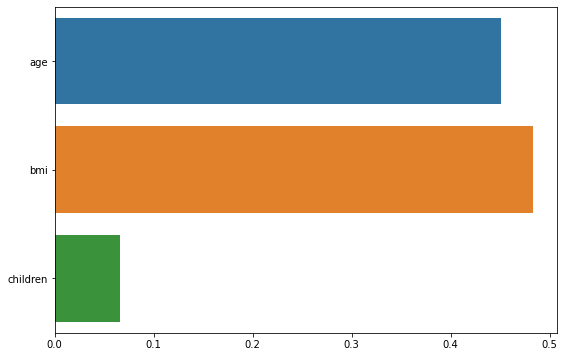

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (9, 6))
sns.barplot(DTR.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()

# 6. Random Forest Regressor

> ## 1) 모델 생성

- criterion : default = 'mse'
   - The function to measure the quality of a split.

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 2000,
                            max_features = 3,
                            max_depth = 1,
                            criterion = 'mse',
                            n_jobs = -1,
                            random_state = 2045)
RFR.fit(X_train, y_train)

CPU times: user 3.6 s, sys: 445 ms, total: 4.04 s
Wall time: 3.42 s


> ## 2) 모델 평가

In [ ]:
mean_squared_error(y_test, RFR.predict(X_test))
# MSE : DecisionTree > MultiReg > RandomForest > Lasso > Ridge > Elastic
#          140104079 > 114300134 > 114282870 > 114279766 > 113578068 > 113571195

114282870.90114409

## 3) Feature Importance

In [ ]:
RFR.feature_importances_

array([0.794, 0.206, 0.   ])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


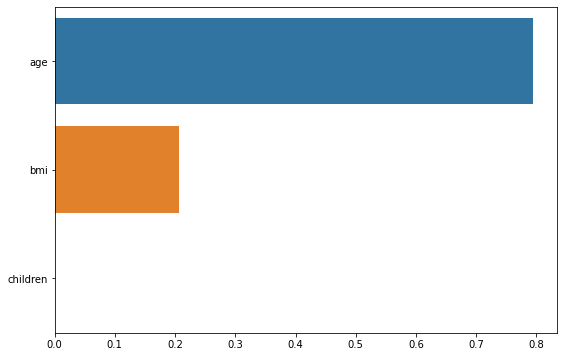

In [ ]:
plt.figure(figsize = (9, 6))
sns.barplot(RFR.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()

# 7. Gradient Boosting Machine(GBM) Regressor

- 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성

> ## 1) 모델 생성

- loss : Optimization Method
   - 'ls' : Least Squares Regression
- n_estimators : 생성되는 트리의 수
   - 값이 크면 모델의 복잡도가 증가
   - 오차를 보정할 기회가 증가
- learning_rate : 이전 트리의 오차를 얼마나 강하게 보정할 것인지 제어
   - 값이 크면 강한 보정에 의해 복잡한 트리 생성

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(loss = 'ls',
                                 n_estimators = 9000,
                                 learning_rate = 0.0001,
                                 criterion = 'mse',
                                 max_features = 3,
                                 max_depth = 1)
GBR.fit(X_train, y_train)

CPU times: user 4.05 s, sys: 3.47 ms, total: 4.06 s
Wall time: 4.07 s


> ## 2) 모델 평가

In [ ]:
mean_squared_error(y_test, GBR.predict(X_test))
# MSE : DecisionTree > GredientBoo > MultiReg > RandomForest > Lasso > Ridge > Elastic
#          140104079 > 118523943 > 114300134 > 114282870 > 114279766 > 113578068 > 113571195

118523943.40353534

> ## 3) Feature Importance

In [ ]:
GBR.feature_importances_

array([0.68958147, 0.31041853, 0.        ])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


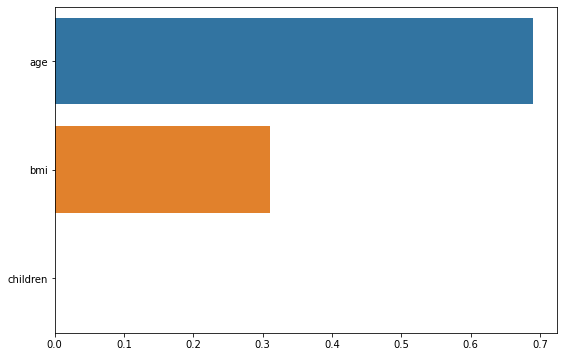

In [ ]:
plt.figure(figsize = (9, 6))
sns.barplot(GBR.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()

# 8. Adaptive Boosting Regressor

- 이전 트리가 잘못 예측한 샘플에 가중치를 높여서 다음 트리를 훈련
- 훈련된 모델은 성능에 따라 가중치가 부여

> ## 1) 모델 생성

- loss : The loss function to use when updating the weights after each boosting iteration
- base_estimator = None
   - DecisionTressRegressor
   - max_depth = 3
   - random_state = 2045

In [ ]:
%%time
from sklearn.ensemble import AdaBoostRegressor
ABR = AdaBoostRegressor(loss = 'square',
                        n_estimators = 500,
                        learning_rate = 0.0001,
                        random_state = 2045)
ABR.fit(X_train, y_train)

CPU times: user 910 ms, sys: 0 ns, total: 910 ms
Wall time: 917 ms


> ## 2) 모델 평가

In [ ]:
mean_squared_error(y_test, ABR.predict(X_test))
# MSE : DecisionTree > GredientBoo > AdaptiveBoo > MultiReg > RandomForest > Lasso > Ridge > Elastic
#           140104079 > 118523943 > 118481893 > 114300134 > 114282870 > 114279766 > 113578068 > 113571195

118481893.52922821

> ## 3) Feature Importance

In [ ]:
ABR.feature_importances_

array([0.57474029, 0.3843226 , 0.04093711])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


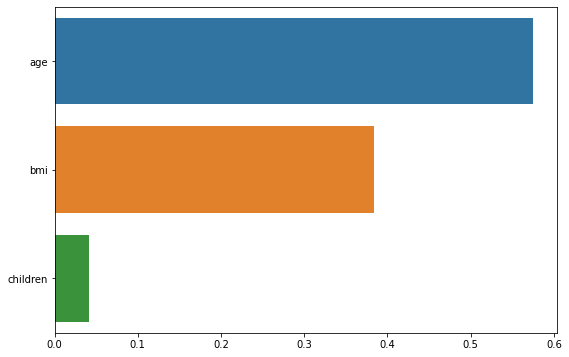

In [ ]:
plt.figure(figsize = (9, 6))
sns.barplot(ABR.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()

# 9. eXtra Gradient Boost(XGBoost) Regressor 

- ### 최근 ML 경향
- ### Feature Importance를 제공하지 않는다.

> ## 1) 모델 생성

In [ ]:
%%time
from xgboost import XGBRegressor
XGB = XGBRegressor(booster = 'gblinear',
                   n_estimators = 100,
                   learning_rate = 0.4,
                   reg_lambda = 2.0,
                   n_jobs = -1)
XGB.fit(X_train, y_train)

[02:15:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 56.6 ms, sys: 11.4 ms, total: 68 ms
Wall time: 135 ms


> ## 2) 모델 평가

In [ ]:
mean_squared_error(y_test, XGB.predict(X_test))
# MSE : DecisionTree > GredientBoo > AdaptiveBoo > MultiReg > RandomForest > Lasso > Ridge > Elastic > XGBoost
#           140104079 > 118523943 > 118481893 > 114300134 > 114282870 > 114279766 > 113578068 > 113571195 > 112756389

112756389.31668736

# 10. LightGBM Regressor

> ## 1) 모델 생성

In [ ]:
%%time
from lightgbm import LGBMRegressor
LGB = LGBMRegressor(linear_tree = True,
                    boosting_type = 'gbdt',
                    objective = 'regression',
                    n_estimators = 500,
                    learning_rate = 0.001,
                    max_depth = 2, 
                    n_jobs = -1)
LGB.fit(X_train, y_train)

CPU times: user 106 ms, sys: 6.82 ms, total: 113 ms
Wall time: 69.1 ms


> ## 2) 모델 평가

In [ ]:
mean_squared_error(y_test, LGB.predict(X_test))
# MSE : DecisionTree > LightGBM > GredientBoo > AdaptiveBoo > MultiReg > RandomForest > Lasso > Ridge > Elastic > XGBoost
# 140104079 > 119555446 > 118523943 > 118481893 > 114300134 > 114282870 > 114279766 > 113578068 > 113571195 > 112756389

119555446.90396042

> ## 3) Feature Importance

In [ ]:
LGB.feature_importances_

array([909, 591,   0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


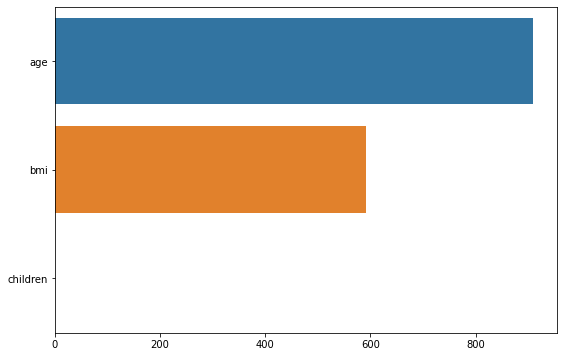

In [ ]:
plt.figure(figsize = (9, 6))
sns.barplot(LGB.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()

### 
# The End
###